# Load all structs and functions

In [1]:
include("src/EchoVisualization.jl")

_echo_edges_visualization! (generic function with 1 method)

# Create a connected graph Topology

In [2]:
number_of_nodes = 30
g = create_scale_free_topology(number_of_nodes)
# g = create_small_world_topology(number_of_nodes)

{30, 56} undirected simple Int64 graph

In [3]:
# We do not deliver any content with the Echo messages...
struct NoContent <: MessageContent end

cb(content::Letter{Int64,NoContent}) = NoContent()

cb (generic function with 1 method)

# Initialize EchoAlgorithm and Graph Visualization

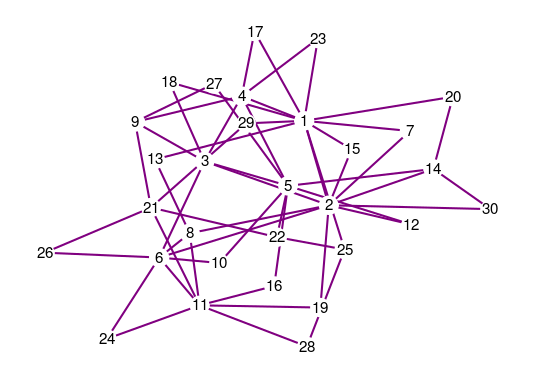

In [4]:
initiator = 1
echo_alg = EchoAlgorithm{Int64}(g, initiator)
init_echo_algorithm!(echo_alg, NoContent())
fgp = FixedGraphPlot{Int64}(g)
gc = graph_context(fgp)

# Run algorithm and create Animation

In [5]:
anim = Animation()
frame(anim, gc)
i = 0
while !has_terminated(echo_alg)
    i += 1
    echo_algorithm_step!(echo_alg, cb)
    echo_visualization!(fgp, echo_alg)
    gc = graph_context(fgp)
    frame(anim, gc)
end
"$i steps"

"112 steps"

# Save and display gif Animation

┌ Info: Saved animation to 
│   fn = /home/tom/Uni/dist-algorithms/pics/echo_sim.gif
└ @ Plots /home/tom/.julia/packages/Plots/9C6z9/src/animation.jl:114


Plots.AnimatedGif("/home/tom/Uni/dist-algorithms/pics/echo_sim.gif")
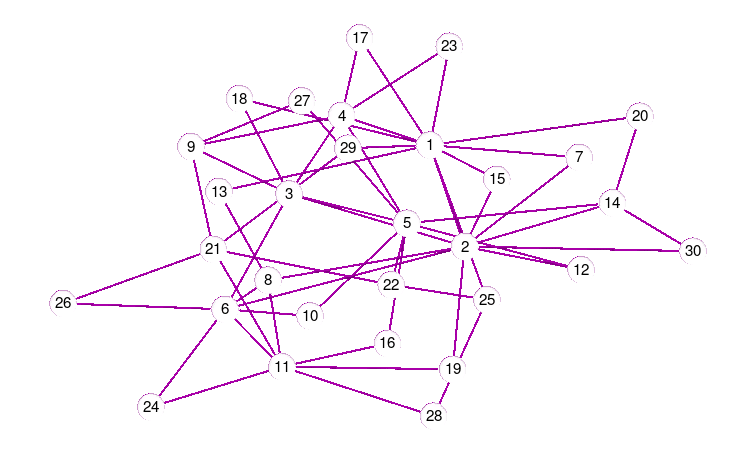

In [6]:
gif(anim, "pics/echo_sim.gif", fps = 5)

## Legend

green Edges are the Echo Tree

M : Explorer Message

R : Request Message

white : not informed

red : informed but no echo

green : informed and echo

sender : white => colorant"honeydew", red => colorant"lightcoral", green => colorant"mediumspringgreen"

recipient : white => colorant"snow4", red => colorant"darkred", green => colorant"darkgreen"

initiator : white => colorant"navajowhite", red => colorant"crimson", green => colorant"yellowgreen"
